<a href="https://colab.research.google.com/github/clashleyuncc/Intro-To-ML/blob/main/Final-Project/MLProjectLogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

  Light_Load       0.87      0.85      0.86      3625
Maximum_Load       0.52      0.45      0.48      1435
 Medium_Load       0.52      0.60      0.55      1948

    accuracy                           0.70      7008
   macro avg       0.64      0.63      0.63      7008
weighted avg       0.70      0.70      0.70      7008



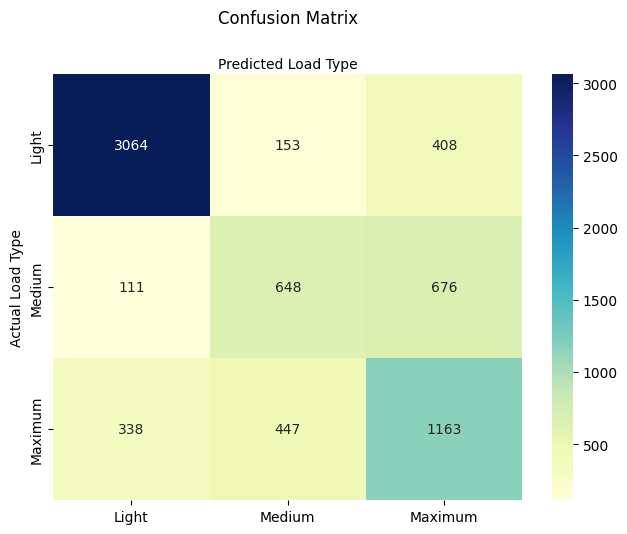

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

# Use of Logistic Regression to classify the data from UC Irinve's
# "Steel Industry Energy Consumption" dataset into Light, Medium,
# and Maximum load

url = 'https://raw.githubusercontent.com/clashleyuncc/Intro-To-ML/refs/heads/main/Final-Project/Steel_industry_data.csv'
file_path = url

data = pd.read_csv(file_path) #10 input params, 1 output


varlist = ['Day_of_week','WeekStatus']
def value_map(x):
    return x.map({'Weekday': 1, 'Weekend': 0, 'Sunday': 6, 'Monday': 5,
                  'Tuesday': 4, 'Wednesday': 3, 'Thursday': 2,
                  'Friday': 1, 'Saturday': 0})

data[varlist] = data[varlist].apply(value_map)

#date = data.pop('date') #temp

from datetime import datetime
time_format = "%d/%m/%Y %H:%M"
def hour(date_time):
    dt = datetime.strptime(date_time, time_format)
    start_of_day = dt.replace(hour=0, minute=0, second=0, microsecond=0)
    delta = dt - start_of_day
    return delta.total_seconds() / 3600  # Total hours
vardate = 'date'
data[vardate] = data[vardate].apply(hour)

Y = data.pop('Load_Type')
X = data

X = StandardScaler().fit_transform(X)

Ytarget = pd.DataFrame(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression(penalty='l1', C=0.001, solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

cnf_matrix = confusion_matrix(Y_test, predicted)

report = classification_report(Y_test, predicted)
print(report)

class_names=['Light','Medium','Maximum'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Load Type')
plt.xlabel('Predicted Load Type')
plt.show()

In [15]:


C = [10, 1, .1, .001]
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, Y_train))
    print('Test accuracy:', clf.score(X_test, Y_test))
    print('')



C: 10
Training accuracy: 0.7572060502283106
Test accuracy: 0.7552796803652968

C: 1
Training accuracy: 0.7574557648401826
Test accuracy: 0.7554223744292238

C: 0.1
Training accuracy: 0.7578481735159818
Test accuracy: 0.7558504566210046

C: 0.001
Training accuracy: 0.6989155251141552
Test accuracy: 0.69449200913242

